In [1]:
cd '/mmfs1/data/aglinska/BC-MRI-AE/'

/mmfs1/data/aglinska/BC-MRI-AE


In [2]:
import pickle 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
rsa = pickle.load(open('all_rsa_rsa_results.pickle','rb'))

In [242]:
keys = list(rsa.keys())

In [7]:
pallete = sns.color_palette()
pallete_new = sns.color_palette()

In [17]:
data.shape

(10, 3)

In [240]:
def plot_nice_bar(key,rsa):
    #key = 'ADOS_gotham_PC1'

    fig, ax = plt.subplots(1,1,figsize=(5,7))

    pallete_new[1]=pallete[0]
    pallete_new[0]=pallete[1]
    pallete_new[0] = tuple(np.array((.5,.5,.5)))

    data=rsa[key]
    n = data.shape[0]
    c = data.shape[1]
    x = np.arange(c)
    


    for i in range(c):
        plot_data = np.zeros(data.shape)
        plot_data[:,i] = data[:,i]

        xs = np.repeat(i,n)+(np.random.rand(n)-.5)*.1
        sc = plt.scatter(xs,data[:,i],c='k')
        b = sns.barplot(data=plot_data,errcolor='r',linewidth=2.5,facecolor=np.hstack((np.array(pallete_new[i]),.3)),edgecolor=np.hstack((np.array(pallete_new[i]),1)))
        #sns.barplot(x=i,y=data.mean(axis=0)[i],errcolor='r',linewidth=2.5,facecolor=np.hstack((np.array(pallete_new[i]),.7)),edgecolor=np.hstack((np.array(pallete_new[i]),.7)))

    plt.xlabel(key,fontsize=14,labelpad=25.1)
    #xlbls = ['VAE','BG','SL']
    locs, labels = plt.yticks()  
    new_y = locs
    new_y = np.linspace(locs[0],locs[-1],6)
    plt.yticks(new_y,labels=[f'{yy:.2f}' for yy in new_y],fontsize=14)
    plt.ylabel('model fit (r)',fontsize=14)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2.5)

    xlbls = ['VAE','BG','SL']
    plt.xticks(np.arange(3),labels=xlbls,fontsize=14)


    do_one_sample_stars = True
    if do_one_sample_stars:
        one_sample = np.array([ttest_1samp(data[:,i],0) for i in range(3)])
        one_sample_thresh = np.array((1,.05,.001,.0001))
        one_sample_stars = np.array(('n.s.','*','**','***'))
        xlbls = ['VAE','BG','SL']
        for i in range(c):
            these_stars = one_sample_stars[max(np.nonzero(one_sample[i,1]<one_sample_thresh)[0])]
            xlbls[i] = f'{xlbls[i]}({these_stars})'
        plt.xticks(np.arange(3),labels=xlbls,fontsize=14)

    pairwise_t = np.zeros((3,3))
    pairwise_p = np.zeros((3,3))

    pairwise_sample_thresh = np.array((1,.05,.001,.0001))
    pairwise_sample_stars = np.array(('n.s.','*','**','***'))

    for i in range(c):
        for j in range(c):
            t,p = ttest(data[:,i],data[:,j])
            pairwise_t[i,j] = t
            pairwise_p[i,j] = p

    #comps = [[0,1],[0,2],[1,2]]
    comps = [[1,2]]
    for comp_idx in range(len(comps)):
        this_comp = comps[comp_idx]
        sig_idx = max(np.nonzero(pairwise_p[this_comp[0],this_comp[1]]<pairwise_sample_thresh)[0])
        max_y = new_y[-1] + comp_idx*.05
        xs = np.array(this_comp)
        stars = pairwise_sample_stars[sig_idx]
        plt.plot(xs,[max_y,max_y],'k',linewidth=2.5)
        plt.text(xs.mean(),max_y,stars,fontsize=25,horizontalalignment='center')

In [264]:
keys[0]

'ADOS_Total'

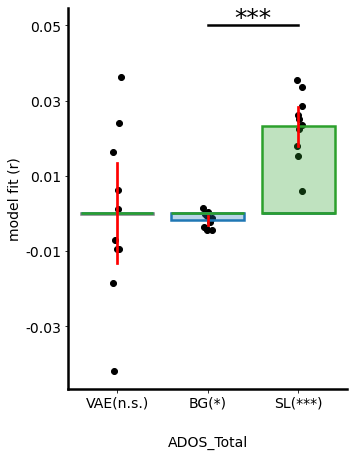

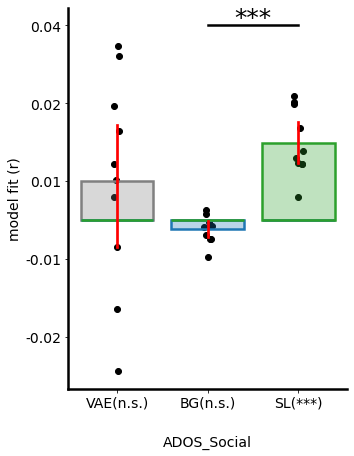

In [265]:
for idx,key in enumerate(keys[0:2]):
    plot_nice_bar(key,rsa)
    #plt.savefig(f'/mmfs1/data/aglinska/BC-MRI-AE/Results/figures/barplots/bar_{key}.png')

In [425]:
these_keys = keys[0:16]


In [429]:
these_keys = ['ADOS_Total',
 'ADOS_Social',
 'DSMIVTR',
 'AgeAtScan',
 'Sex',
 'ScannerID',
 'ScanSiteID',
 'FIQ',
 'ADOS_PC1',
 'ADI_PC1',
 'ADOS_gotham_PC1',
 'Vineland_PC1',
 'WISC_PC1',
 'pca_vineland_asd']

n = len(these_keys)

In [430]:
arr = np.array([rsa[key] for key in these_keys])
print(arr.shape)

diff = arr[:,:,2]-arr[:,:,1]


idx = np.argsort(diff.mean(axis=1))
lbls = np.array(these_keys)[idx]
diff = diff[idx,:]


vals = diff.mean(axis=1);

(14, 10, 3)


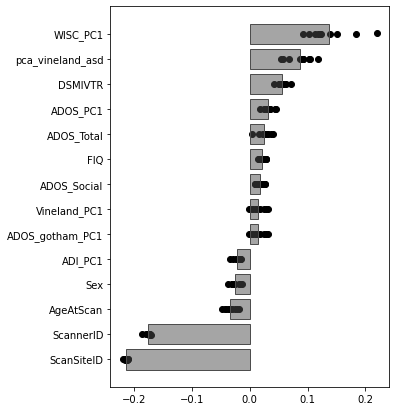

In [435]:
fig,axs = plt.subplots(1,1,figsize=(5,7))

xs = np.arange(len(vals));

for i in range(n):
    plt.barh(xs[i],vals[i],edgecolor=[.3,.3,.3,1],facecolor=[.3,.3,.3,.5]);

plt.yticks(xs,labels=lbls);

for i in range(n):
    xs = np.repeat(i,10)+(np.random.rand(10)-.5)*.01
    plt.scatter(diff[i,:],xs,c='k')